In [26]:
import numpy as np
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sms=pd.read_csv("spam.csv", encoding="latin-1")
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 1. DATA PREPROCESSING 


In [34]:
sms.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [35]:
sms.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [36]:
sms.shape

(5572, 5)

## Checking for null values

In [37]:
sms.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          v1     v2  Unnamed: 2  Unnamed: 3  Unnamed: 4
0     False  False        True        True        True
1     False  False        True        True        True
2     False  False        True        True        True
3     False  False        True        True        True
4     False  False        True        True        True
...     ...    ...         ...         ...         ...
5567  False  False        True        True        True
5568  False  False        True        True        True
5569  False  False        True        True        True
5570  False  False        True        True        True
5571  False  False        True        True        True

[5572 rows x 5 columns]>

## Droping null values

In [38]:
sms=sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [39]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Duplicate Values


In [40]:
sms.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool>

## Renaming the columns


In [42]:
sms=sms.rename(columns={"v1":"label","v2":"text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## 2. EDA

In [44]:
print("no of rows", len(sms))

no of rows 5572


In [45]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: ylabel='Frequency'>

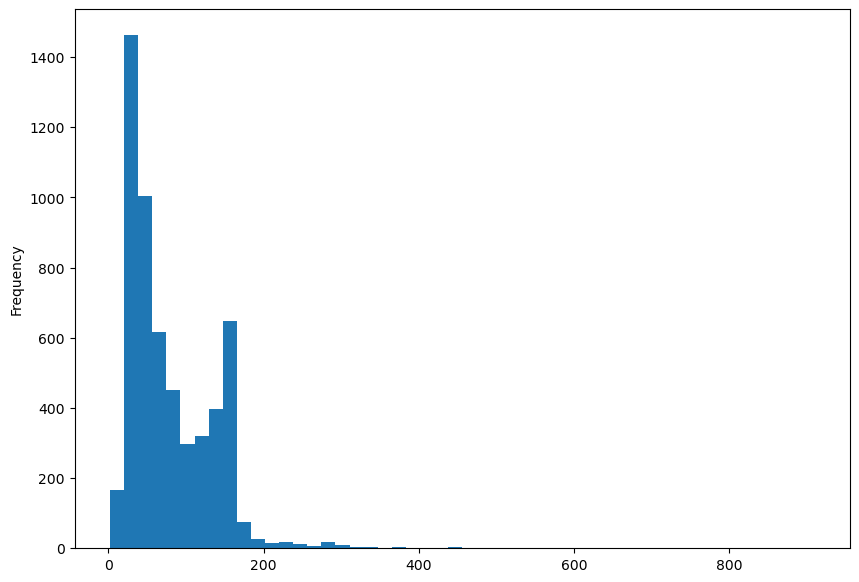

In [18]:
smsspam['length'].plot(bins=50, kind='hist',figsize=(10,7))

In [47]:
sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})
sms.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_11584\1727894437.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})


,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


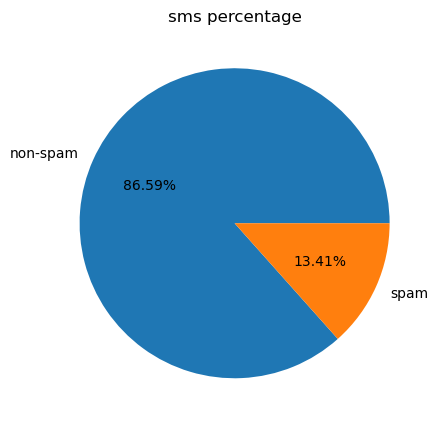

In [48]:
plt.figure(figsize=(5,6))
plt.pie(sms['label'].value_counts(),autopct='%1.2f%%',labels=['non-spam','spam'])
plt.title('sms percentage')  
plt.show()

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

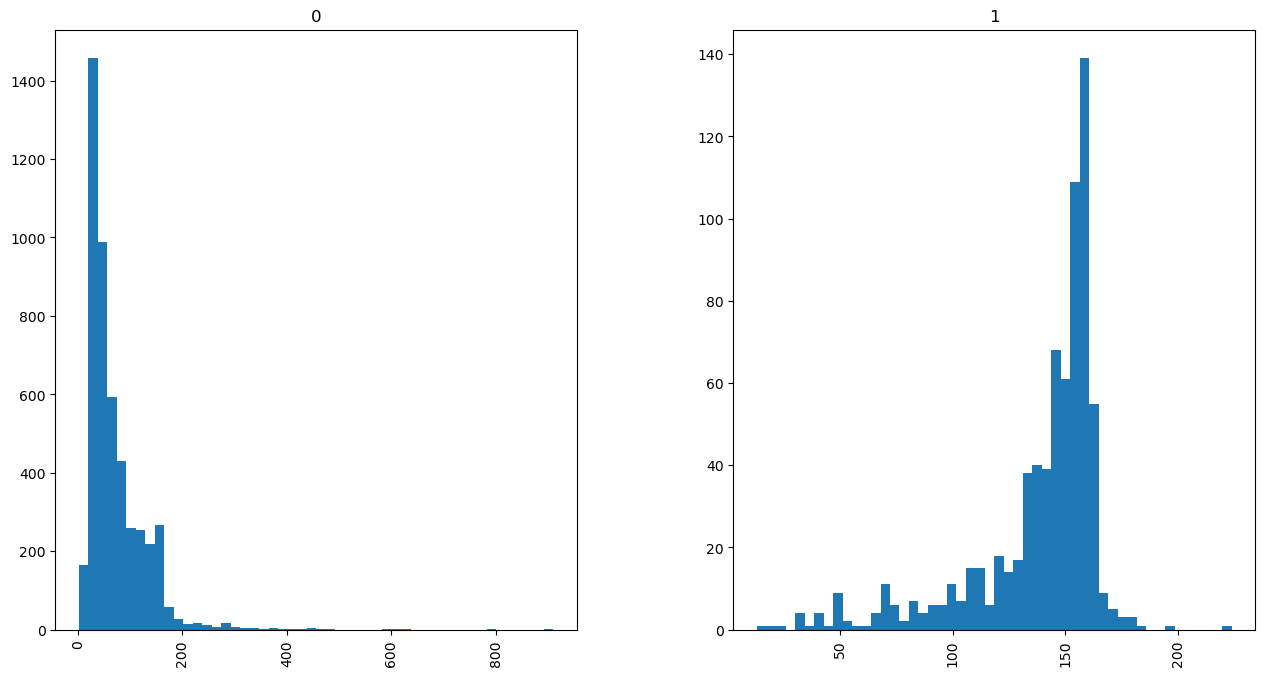

In [49]:
sms.hist(column='length', by='label', bins=50, figsize=(15,8))

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
count=CountVectorizer()
input=["REMINDER FROM 02: To get 2.50 pounds free call credit and details of great offers"]

text=count.fit_transform(sms['text'])


x_train, x_test, y_train, y_test= train_test_split(text, sms['label'], test_size=0.20, random_state=1 )
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [51]:
print(x_train.shape)
print(x_test.shape)

input=text[5571]

(4457, 8672)
(1115, 8672)


In [52]:
sms['length'].max()

910

In [57]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [58]:
pred=model.predict(x_test)
print(pred)

[0 0 0 ... 0 0 0]


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print("Recall score: {}". format(recall_score(y_test, pred)) )
print("F1 score: {}". format(f1_score(y_test, pred)) )
print("Accuracy score: {}". format(accuracy_score(y_test, pred)) )
print("Precision score: {}". format(precision_score(y_test, pred)))
print("Bernoulli NB")

Recall score: 0.9496402877697842
F1 score: 0.974169741697417
Accuracy score: 0.9937219730941704
Precision score: 1.0
Bernoulli NB


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Recall score: {}". format(recall_score(y_test, pred)) )
print("F1 score: {}". format(f1_score(y_test, pred)) )
print("Accuracy score: {}". format(accuracy_score(y_test, pred)) )
print("Precision score: {}". format(precision_score(y_test, pred)) )
print("Multinomial NB")



Recall score: 0.9496402877697842
F1 score: 0.974169741697417
Accuracy score: 0.9937219730941704
Precision score: 1.0
Multinomial NB


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("MLP Classifier")
print("Accuracy score: {}". format(accuracy_score(y_test, pred)) )
print("Recall score: {}". format(recall_score(y_test, pred)))
print("Precision score: {}". format(precision_score(y_test, pred)))
print("F1 score: {}". format(f1_score(y_test, pred)))

MLP Classifier
Accuracy score: 0.9937219730941704
Recall score: 0.9496402877697842
Precision score: 1.0
F1 score: 0.974169741697417


In [64]:
input

<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [65]:
model.predict(input)

array([0], dtype=int64)

In [66]:
data=sms["text"]
input="To get 2.50 pounds free call credit"

In [67]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [68]:
text=count.fit_transform(data)

In [69]:
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [70]:
input=text[550]

In [71]:
data.loc[len(data.index)]="gssgs rtgnj yyj"

In [72]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572                                      gssgs rtgnj yyj
Name: text, Length: 5573, dtype: object

In [73]:
model.predict(input)

array([0], dtype=int64)